In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import subprocess
import sys
import timeit

In [2]:
### adaptation of previous function for mask array ###
#with use of True/False mask array, can instruct that any points included in a boundary are excluded from finite difference
#this way, the values only need to be set initially
#and maxcol list can be ignored beyond initialisation
# - so, in the function, after determining the type (maxcol) of a point, set whether it should be edited or not
# --- then pass the mask array instead of maxcol
# --- maxcol need only be a variable now


def readimage(filename, Vmax=1000):
    
    ### Reading image from file ###
    
    #use try/except to handle any problems with the file
    #get the image into an array, then get its dimensions to set up the potential and mask arrays
    #image.shape returns the 3D dimensions, but we only want 2D so exclude the last item
    if filename.endswith(("png","jpg","bmp","jpeg")):
        image = mpimg.imread(filename)
        height, width = image.shape[:-1]
    else:
        sys.exit("Invalid file given. Failed to read any data.")
        
    #define the arrays we need, matching the image dimensions
    #and initially at zero everywhere
    #also define mask as being an array of zeros, as this is how False is interpreted
    potential = np.zeros((height, width))
    mask = np.zeros((height, width))
    
    
    #Now go through each pixel of the image and determine the boundaries
    for i in range(height):
        for j in range(width):
            mxindex = [col for col in range(3) if image[i][j][col] == np.amax(image[i][j][:3])]

            if len(mxindex) != 1:
                maxcol = 3
            else:
                maxcol = mxindex[0]
            
            if maxcol == 3:
                potential[i][j] = 0
                mask[i][j] = True
            elif maxcol == 2:
                potential[i][j] = 0
            elif maxcol == 1:
                potential[i][j] = - Vmax*image[i][j][maxcol]
            elif maxcol == 0:
                potential[i][j] = Vmax*image[i][j][maxcol]
            
            
            if not filename.endswith("png"):
                potential[i][j] /= 255
    
    #Writing the arrays each to a text file
    #using float format, else will default to using scientific notation (harder to read)
    np.savetxt("potentialarray.txt", potential, delimiter=" ", fmt = "%f")
    np.savetxt("maskarray.txt", mask, delimiter=" ", fmt = "%f")
    
    
    return

In [8]:
readimage("problemC.png")

2min 3s ± 3.12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [3]:
# readimage("problemC.png")

8.4 s ± 56.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [28]:
### Working on file output ###
#won't work unless arrays returned at end of function (removed this part for general program)
# Problem C
# potential, mask = readimage("problemC.png")
# np.savetxt("potentialarrayC.txt", potential, delimiter=" ", fmt = "%f")
# np.savetxt("maskarrayC.txt", mask, delimiter=" ", fmt = "%f")

In [4]:
### Getting outputs for all the problems in the guide ###
# Analytical 1 (Co-axial Cylinders):
# potential, mask = readimage("example1.png")
# np.savetxt("potentialarrayEx1.txt", potential, delimiter=" ", fmt = "%f")
# np.savetxt("maskarrayEx1.txt", mask, delimiter=" ", fmt = "%f")

In [30]:
# Analytical 2 (Plates + Cylinder):
# potential, mask = readimage("example2.png")
# np.savetxt("potentialarrayEx2.txt", potential, delimiter=" ", fmt = "%f")
# np.savetxt("maskarrayEx2.txt", mask, delimiter=" ", fmt = "%f")

In [31]:
# Problem A (Multi-Wire chamber):
# potential, mask = readimage("problemA.png")
# np.savetxt("potentialarrayA.txt", potential, delimiter=" ", fmt = "%f")
# np.savetxt("maskarrayA.txt", mask, delimiter=" ", fmt = "%f")

In [32]:
# Problem B (Edge-Coupled Stripline):
# potential, mask = readimage("problemB.png")
# np.savetxt("potentialarrayB.txt", potential, delimiter=" ", fmt = "%f")
# np.savetxt("maskarrayB.txt", mask, delimiter=" ", fmt = "%f")

In [13]:
# for i in range(1,7):
#     % timeit -r 3 readimage("testimg{}.png".format(i))

4.02 ms ± 28.8 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
85.6 ms ± 278 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
332 ms ± 2.33 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
8.32 s ± 7.98 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
33.2 s ± 207 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


KeyboardInterrupt: 

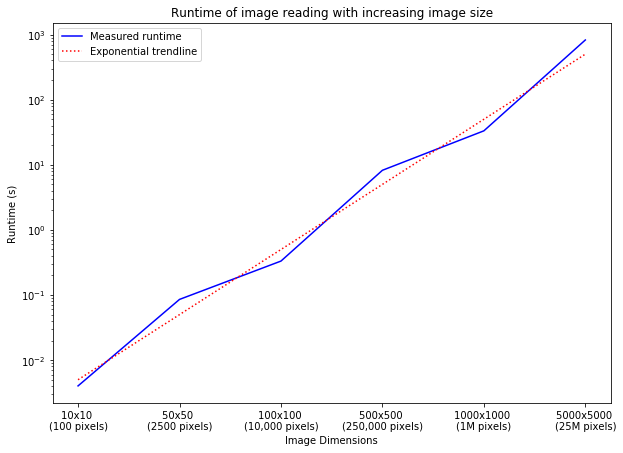

In [123]:
dimensions = ["10x10 \n(100 pixels)","50x50 \n(2500 pixels)","100x100 \n(10,000 pixels)","500x500 \n(250,000 pixels)","1000x1000 \n(1M pixels)","5000x5000 \n(25M pixels)"]
runtimes = [0.00402, 0.0856, 0.332, 8.23, 33.2, 825]

xaxis = np.arange(1, len(dimensions)+1)

plt.figure(figsize=(10,7))
plt.title("Runtime of image reading with increasing image size")
plt.plot(xaxis, runtimes, "b-", label="Measured runtime")
plt.plot(xaxis, 10**(xaxis) * 5/100**2, "r:", label="Exponential trendline")
plt.xticks(xaxis, dimensions)
plt.yscale("log")
plt.xlabel("Image Dimensions")
plt.ylabel("Runtime (s)")
plt.legend()
plt.savefig("runtime.png")
plt.show()